In [1]:
import os

# Define the paths to the images and labels folders
image_folder = '../brain_tumor/data/images/'
label_folder = '../brain_tumor/data/labels/'

# Get a list of all image files
image_files = {os.path.splitext(f)[0]: os.path.join(image_folder, f)
               for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))}

# Get a list of all label files
label_files = {os.path.splitext(f)[0]: os.path.join(label_folder, f)
               for f in os.listdir(label_folder) if f.endswith('.txt')}

# 🔥 Delete unmatched images
for image_id in list(image_files.keys()):
    if image_id not in label_files:
        print(f"Deleting image without label: {image_files[image_id]}")
        os.remove(image_files[image_id])
        del image_files[image_id]

# 🔥 Delete unmatched labels
for label_id in list(label_files.keys()):
    if label_id not in image_files:
        print(f"Deleting label without image: {label_files[label_id]}")
        os.remove(label_files[label_id])
        del label_files[label_id]

# Now only matching pairs remain
mapped_data = {
    image_id: {"image": image_files[image_id], "label": label_files[image_id]}
    for image_id in image_files
}

# Print sample mappings
for key, value in list(mapped_data.items())[:5]:
    print(f"Image: {value['image']} -> Label: {value['label']}")


Image: ../brain_tumor/data/images/00054_145.jpg -> Label: ../brain_tumor/data/labels/00054_145.txt
Image: ../brain_tumor/data/images/00054_164.jpg -> Label: ../brain_tumor/data/labels/00054_164.txt
Image: ../brain_tumor/data/images/00056_110.jpg -> Label: ../brain_tumor/data/labels/00056_110.txt
Image: ../brain_tumor/data/images/00056_129.jpg -> Label: ../brain_tumor/data/labels/00056_129.txt
Image: ../brain_tumor/data/images/00056_147.jpg -> Label: ../brain_tumor/data/labels/00056_147.txt


In [19]:
import csv

# Path to save the mapping
output_path = '../brain_tumor/data/mapped_data/mapped_data.csv'
# Open the CSV file for writing
with open(output_path, "w", newline="") as csv_file:
    writer = csv.writer(csv_file)

    # Write the header
    writer.writerow(["Image_ID", "Image_Path", "Label_Path"])

    # Write data
    for image_id, paths in mapped_data.items():
        writer.writerow([image_id, paths["image"], paths["label"]])

print(f"Mapping saved to {output_path}")



Mapping saved to ../brain_tumor/data/mapped_data/mapped_data.csv


In [20]:
import os

# Path to the labels folder
label_folder = '../brain_tumor/data/labels/'

# Initialize counters
positive_count = 0
negative_count = 0

# Loop through each label file
for file_name in os.listdir(label_folder):
  file_path = os.path.join(label_folder, file_name)
  with open(file_path, "r") as file:
    first_value = file.readline().split()[0]
    if first_value == "1":
      positive_count += 1
    elif first_value == "0":
      negative_count += 1

# Print results
print(f"Positive Cases (Tumor): {positive_count}")
print(f"Negative Cases (No Tumor): {negative_count}")


Positive Cases (Tumor): 459
Negative Cases (No Tumor): 419


In [2]:
import os
import csv

# === Paths ===
testing_data_folder = '../brain_tumor/data/testing_data'
output_csv_path = '../brain_tumor/data/mapped_data/mapped_testing_data.csv'

# === Supported image extensions
image_exts = ['.jpg', '.jpeg', '.png']

# === Scan and match files
image_files = {}
label_files = {}

# Collect images and labels
for f in os.listdir(testing_data_folder):
    name, ext = os.path.splitext(f)
    full_path = os.path.join(testing_data_folder, f).replace('\\', '/')  # Convert to forward slashes
    if ext.lower() in image_exts:
        image_files[name] = full_path
    elif ext.lower() == '.txt':
        label_files[name] = full_path

# === Map only those that exist in both sets
mapped = {
    k: {"image": image_files[k], "label": label_files[k]}
    for k in image_files.keys() & label_files.keys()
}

# === Write to CSV
with open(output_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image_ID', 'Image_Path', 'Label_Path'])
    for image_id, paths in mapped.items():
        writer.writerow([image_id, paths["image"], paths["label"]])

print(f"✅ Mapping saved to {output_csv_path}")


✅ Mapping saved to ../brain_tumor/data/mapped_data/mapped_testing_data.csv


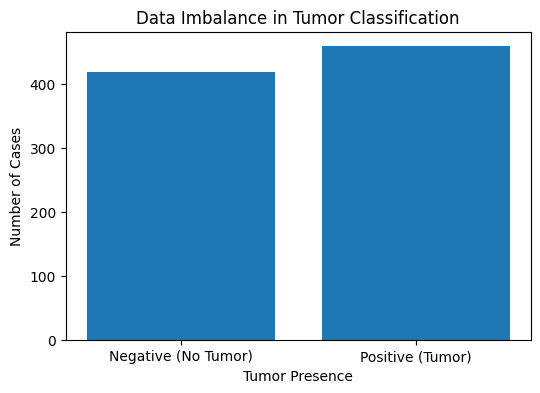

In [21]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ["Negative (No Tumor)", "Positive (Tumor)"]
counts = [negative_count, positive_count]

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(labels, counts)
plt.xlabel("Tumor Presence")
plt.ylabel("Number of Cases")
plt.title("Data Imbalance in Tumor Classification")
plt.show()
